# Importing Libraries #

In [47]:
# Import libraries necessary
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Load the data #

In [48]:
# Read the csv file
df_data = pd.read_csv("realestate.csv")

# Remove the 'No' column
df_data.drop('No', inplace=True, axis=1)

In [49]:
# Print info about the dataset
df_data.head()
df_data.info()

# Declare the dependent variables 
features = df_data.drop('Y house price of unit area', axis=1).columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


# Plotting the independent and dependent variables #

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


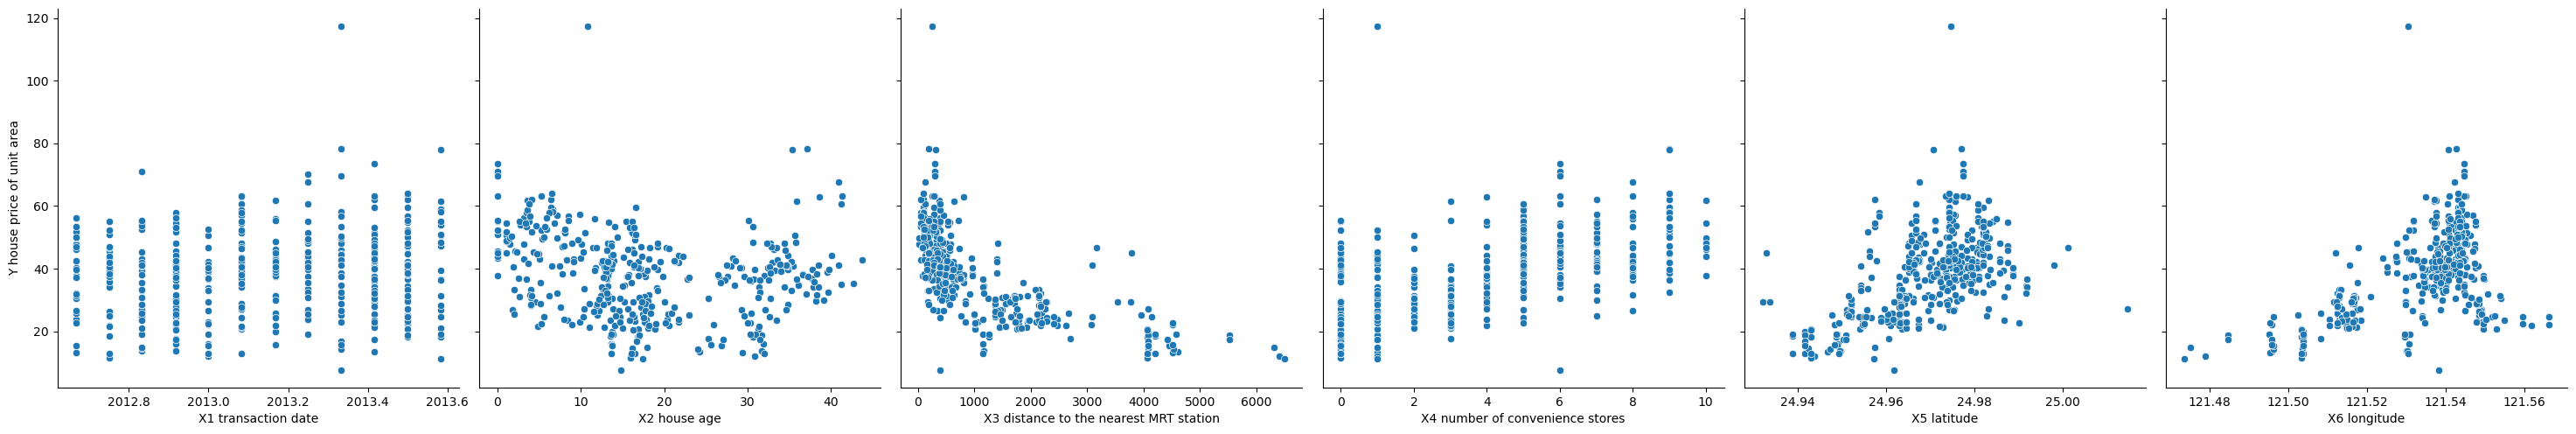

In [57]:
sns.pairplot(df_data, x_vars=features, y_vars='Y house price of unit area', aspect=1, height=5)

# Plotting the heatmap #

<Axes: >

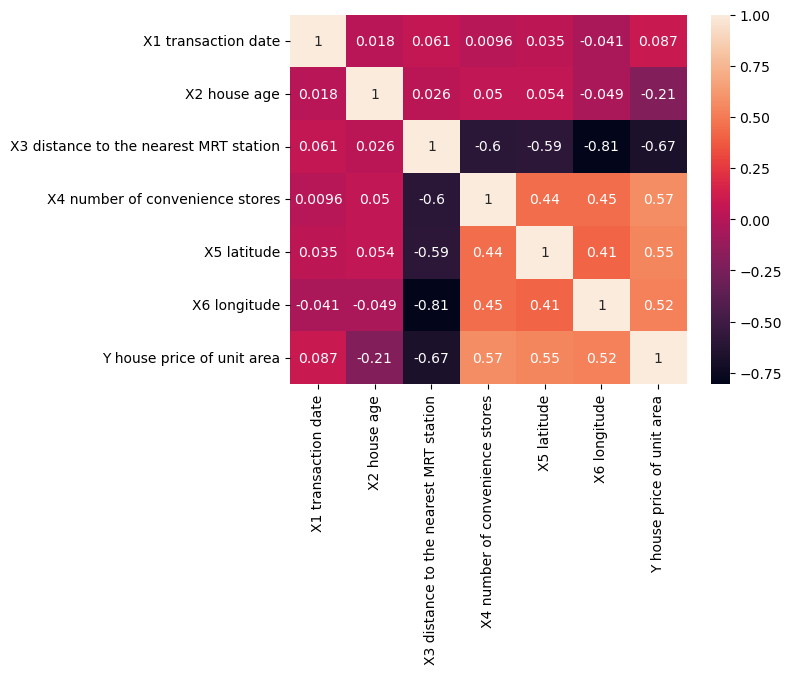

In [51]:
sns.heatmap(df_data.corr(), annot=True)

# Using Linear Regression #

In [52]:
from sklearn.linear_model import LinearRegression

LinearModel = LinearRegression()
x = df_data.drop('Y house price of unit area', axis=1)
y = df_data['Y house price of unit area']
LinearModel.fit(x, y)

print(LinearModel.intercept_)
print(LinearModel.coef_)

list(zip(features, LinearModel.coef_))

-14437.100802280573
[ 5.14622746e+00 -2.69695448e-01 -4.48746107e-03  1.13327690e+00
  2.25472976e+02 -1.24236012e+01]


[('X1 transaction date', 5.1462274629799145),
 ('X2 house age', -0.2696954475804463),
 ('X3 distance to the nearest MRT station', -0.004487461074043686),
 ('X4 number of convenience stores', 1.1332769046491074),
 ('X5 latitude', 225.47297556313208),
 ('X6 longitude', -12.42360117334045)]

## Calculating the linear regression model #1 accuracy ##

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LinearModel_Predictions = LinearModel.predict(x)

print("mean_squared_error : ", mean_squared_error(y, LinearModel_Predictions))  
print("R2 : ", r2_score(y, LinearModel_Predictions))

mean_squared_error :  77.13171720187268
R2 :  0.582370447272305


## Plotting the actual vs predicted values on a graph ##

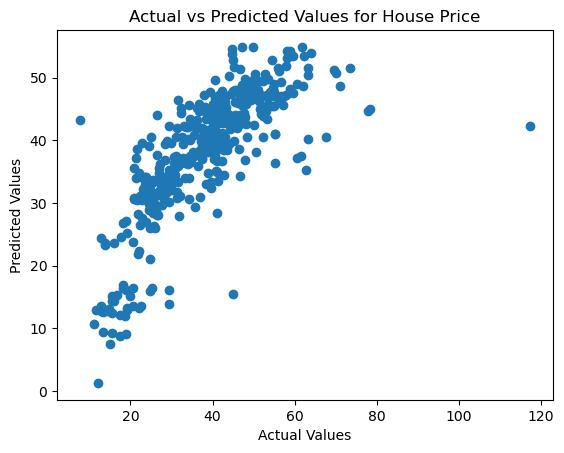

In [54]:
plt.scatter(y, LinearModel_Predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for House Price")
plt.show()